In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import operator

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from pyspark.sql.functions import *

nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/andra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
tweets = pd.read_csv("tweets.csv", sep = ";", error_bad_lines = False, encoding = 'utf8')
tweets = tweets.fillna(0)
tweets


Skipping line 18: expected 13 fields, saw 14
Skipping line 53: expected 13 fields, saw 15
Skipping line 118: expected 13 fields, saw 14
Skipping line 208: expected 13 fields, saw 14
Skipping line 258: expected 13 fields, saw 14
Skipping line 264: expected 13 fields, saw 14
Skipping line 389: expected 13 fields, saw 14
Skipping line 415: expected 13 fields, saw 14
Skipping line 465: expected 13 fields, saw 14
Skipping line 560: expected 13 fields, saw 14
Skipping line 632: expected 13 fields, saw 14
Skipping line 730: expected 13 fields, saw 14
Skipping line 761: expected 13 fields, saw 14
Skipping line 790: expected 13 fields, saw 14
Skipping line 831: expected 13 fields, saw 14
Skipping line 853: expected 13 fields, saw 14
Skipping line 862: expected 13 fields, saw 14
Skipping line 902: expected 13 fields, saw 14
Skipping line 912: expected 13 fields, saw 14
Skipping line 948: expected 13 fields, saw 14
Skipping line 956: expected 13 fields, saw 14
Skipping line 962: expected 13 field

,username,date,retweets,favorites,text,tokens,geo,location,mentions,hashtags,id,query,permalink
0,Arriva_NL,2017-12-11 16:14,0,0,Ik zie dat de voorgaande rit wel heeft gereden...,"['Ik', 'zie', 'dat', 'de', 'voorgaande', 'rit'...",0,Heerenveen,0,0,940223278093864960,Arriva AND vertraging,https://twitter.com/Arriva_NL/status/940223278...
1,RvanDuuren,2017-12-13 20:38,0,1,"Zit je in een trein naar Breukelen, wordt op s...","['Zit', 'je', 'in', 'een', 'trein', 'naar', 'B...",0,0,@NS,0,941014511045267456,NS AND Overstappen,https://twitter.com/RvanDuuren/status/94101451...
2,LammersMarc,2017-12-10 00:31,0,0,Ik noem dit geen sint Bernard.... En ik heb du...,"['Ik', 'noem', 'dit', 'geen', 'sint', 'Bernard...",0,0,0,0,939623482136162304,aansluiting AND gemist,https://twitter.com/LammersMarc/status/9396234...
3,RETRotterdam,2017-12-13 08:08,1,0,Actuele #RETverstoring #Bus143 Vervallen rit. ...,"['Actuele', '#', 'RETverstoring', '#', 'Bus143...",0,Rotterdam,0,#RETverstoring #Bus143,940825630022754304,Overstappen OR Omleiding OR oponthoud,https://twitter.com/RETRotterdam/status/940825...
4,VerkeerGent,2017-12-06 02:13,0,0,De trein van: Gent-Sint-Pieters om 02:12 naar ...,"['De', 'trein', 'van', ':', 'Gent-Sint-Pieters...",0,"Ghent, Belgium",0,#Oostende #Gent #trein #iRail,938199786431418374,vertraging AND trein,https://twitter.com/VerkeerGent/status/9381997...
5,Bobheyou,2017-12-07 20:02,0,0,De #NS heeft weer eens last van gladde rails. ...,"['De', '#', 'NS', 'heeft', 'weer', 'eens', 'la...",0,holland,0,#NS,938831064008740864,NS AND vertraging,https://twitter.com/Bobheyou/status/9388310640...
6,hoekschewaardwp,2017-12-12 01:03,1,0,"Connexxion hervat dienstregeling, houdt rekeni...","['Connexxion', 'hervat', 'dienstregeling', ','...",0,Oud-Beijerland,0,0,940356432314105856,Connexxion AND vertraging,https://twitter.com/hoekschewaardwp/status/940...
7,bdefrens,2017-12-09 18:55,0,0,"Oh, dat is mij ook een keer gebeurd! Ik moest ...","['Oh', ',', 'dat', 'is', 'mij', 'ook', 'een', ...",0,The Netherlands,0,0,939539060896489472,vertraging AND trein,https://twitter.com/bdefrens/status/9395390608...
8,Yen_li,2017-12-12 08:30,0,2,Ah gelukkig: de trein die ik dacht te gaan mis...,"['Ah', 'gelukkig', ':', 'de', 'trein', 'die', ...",0,0,0,0,940468797772886016,vertraging AND trein,https://twitter.com/Yen_li/status/940468797772...
9,Ilove_hollandia,2017-12-12 16:54,1,0,Had een aanbod gedaan vanwege het niet werken ...,"['Had', 'een', 'aanbod', 'gedaan', 'vanwege', ...",0,0,@rotterdam,#toon #eneco #toon #energie #gas #stroom,940595694058070019,storingen,https://twitter.com/Ilove_hollandia/status/940...


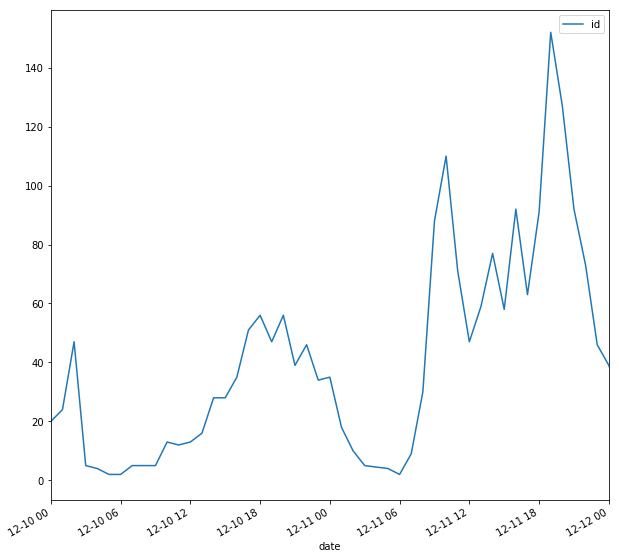

In [39]:
tweets["date"] = pd.to_datetime(tweets["date"])

dates = pd.DataFrame()
dates["id"] = tweets["id"]
dates["date"] = tweets["date"].dt.round('h')

dates.groupby(dates["date"]).count().plot(figsize = (10, 10))
ax = plt.subplot()
ax.set_xlim(pd.Timestamp('2017-12-10'), pd.Timestamp('2017-12-12'))
plt.show()
# dates

In [156]:
tweets['location'] = tweets['location'].str.strip()
tweets.groupby(tweets.location).count()['id'].sort_values(ascending=False)
# df.groupby([df.created_at.dt.month,'product_version']).count()['Id'].reset_index(1)

location
Utrecht                         447
Amsterdam                       291
Heerenveen                      242
Ghent, Belgium                  209
Nederland                       200
Den Haag                        133
Rotterdam                        78
Hilversum                        71
Brussel                          69
The Netherlands                  63
Amsterdam, Nederland             48
Netherlands                      44
Groningen                        22
Belgium                          21
Utrecht, Nederland               19
Groningen, Nederland             15
Den Haag, Nederland              14
Amersfoort                       14
België                           13
Brussels, Belgium                13
Rotterdam, Nederland              9
Maastricht                        9
Utrecht, The Netherlands          9
Antwerpen                         9
Nijmegen                          8
Zwolle                            8
Leiden, Nederland                 8
Holland            

In [77]:
# tokenized_sents = [word_tokenize(i["text"]) for i in tweets]

# tweets['text'].apply(word_tokenize)

# tweets.apply(lambda row: word_tokenize(row['text']))
# def robust_encode(bs):
#     try:
#         return bs.encode('utf8')
#     except UnicodeEncodeError:
#         return ''
# tweets.apply(lambda row: word_tokenize(row['text']), axis=1, ignore_failures = True)

In [211]:
common_words_file = open('common_words.txt')
common_words = common_words_file.read().split(',')
# common_words

In [212]:
occ = {}
def countOcc(words):
    for word in words[1:-1].split(','):
        word = word.strip()[1:-1].encode('utf8').lower()
        if word not in common_words:
            if word not in occ:
                occ[word] = 1
            else:
                occ[word] += 1

In [213]:
a = tweets.apply(lambda row: countOcc(row['tokens']), axis=1)
# tweets.apply(lambda row: print(row['tokens']), axis=1)

sorted_x = sorted(occ.items(), key=operator.itemgetter(1), reverse=True)
# sorted_x

In [214]:
all_text = ""
for word in sorted_x:
    if int(word[1]) > 50:
        for i in range(int(word[1])):
            all_text += word[0] + " "


In [221]:
# text = ""
# with open("most_common.txt") as f:
#     lines = f.readlines()
# for l in lines:
#     line = l.split(" ")
#     for i in range(int(line[0])):
#         text += line[1][:-1] + " "
        
wordCloud = WordCloud(width=2000, height=1000, background_color='white').generate(all_text).to_file("word_cloud2.png")